In [17]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from multiclass_functions1 import * # my module import
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cpu


In [18]:
BATCH_SIZE = 32
LR = 1e-2
EPOCH = 100
criterion = nn.MSELoss()
new_model_train = True
save_model_path = f"/content/drive/MyDrive/Colab Notebooks/results/UAT.pt"

In [19]:
def Test(model,X_test,Y_test):
    model.eval()
    with torch.no_grad():
        X_test = X_test.to(DEVICE)
        Y_test = Y_test.to(DEVICE)
        # inference
        y_hat = model(X_test)
        # loss
        loss = F.mse_loss(y_hat, Y_test)

    plt.plot(X_test,Y_test,'b:',label="true_curve")
    plt.plot(X_test,y_hat,'r',label="test")
    plt.xlabel("x",fontsize=20)
    plt.ylabel("y",fontsize=20)
    plt.grid()
    plt.legend(fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    print(f"Test loss: {loss.item()}")

class Custom_Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y, transform=None):
        self.X = X
        self.Y = Y
        self.transform = transform

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        x = self.X[idx]
        if self.transform:
            x = self.transform(x)
        y = self.Y[idx]
        return x, y

In [20]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1: hidden layer 하나여도 괜찮게 된다! (심지어 노드 3개)
        self.fcs = nn.Sequential(nn.Linear(1, 3),
                                 nn.ReLU(),
                                 nn.Linear(3, 1))
        
        # case 2: 물론 노드를 늘리면 더 잘한다
        self.fcs = nn.Sequential(nn.Linear(1, 10),
                                 nn.ReLU(),
                                 nn.Linear(10, 1))

        # case 3: 늘릴수록 좀더 부드러워짐
        self.fcs = nn.Sequential(nn.Linear(1, 100),
                                 nn.ReLU(),
                                 nn.Linear(100, 1))
        
        # case 4: 천개로 늘리면..? 잘되지만 안보여준 data에 대해선 잘 못함 (overfitting)
        self.fcs = nn.Sequential(nn.Linear(1, 1000),
                                 nn.ReLU(),
                                 nn.Linear(1000, 1))
        
        # case 5: 깊이를 늘려도 노드 수가 너무 적으면 안된다
        self.fcs = nn.Sequential(nn.Linear(1, 3),
                                 nn.ReLU(),
                                 nn.Linear(3, 3),
                                 nn.ReLU(),
                                 nn.Linear(3, 3),
                                 nn.ReLU(),
                                 nn.Linear(3, 3),
                                 nn.ReLU(),
                                 nn.Linear(3, 3),
                                 nn.ReLU(),
                                 nn.Linear(3, 1))
        
        # case 6-1: 노드 수를 적당히 키우고 깊이를 늘림 (부드럽다!)
        self.fcs = nn.Sequential(nn.Linear(1, 10),
                                 nn.ReLU(),
                                 nn.Linear(10, 10),
                                 nn.ReLU(),
                                 nn.Linear(10, 10),
                                 nn.ReLU(),
                                 nn.Linear(10, 10),
                                 nn.ReLU(),
                                 nn.Linear(10, 10),
                                 nn.ReLU(),
                                 nn.Linear(10, 1))
        
        # case 6-2: 비교를 위해.. 얕으면 어땠었지?
        # => 노드가 많으면 좀더 사이사이가 좁아져서 디테일을 잘 표현
        #    깊이가 깊으면 nonlinearity가 좀더 커진다고 해석 가능
        self.fcs = nn.Sequential(nn.Linear(1, 10),
                                 nn.ReLU(),
                                 nn.Linear(10, 1))
        
    def forward(self,x):
        x = torch.flatten(x, start_dim=1)
        x = self.fcs(x)
        return x

In [21]:
X=torch.linspace(-10,10,1000).reshape(-1,1)
Y=X**2
X_test=torch.linspace(-15,15,1000).reshape(-1,1)
Y_test=X_test**2

In [22]:
train_DS = Custom_Dataset(X, Y)
train_DL = torch.utils.data.DataLoader(train_DS, batch_size = BATCH_SIZE, shuffle = True)

In [23]:
model=MLP().to(DEVICE)
print(model)
x_batch, _ = next(iter(train_DL))
print(model(x_batch.to(DEVICE)).shape)

MLP(
  (fcs): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)
torch.Size([32, 1])


Epoch: 1 train loss: 1727.231
--------------------
Epoch: 2 train loss: 1008.442
--------------------
Epoch: 3 train loss: 381.704
--------------------
Epoch: 4 train loss: 191.599
--------------------
Epoch: 5 train loss: 172.649
--------------------
Epoch: 6 train loss: 160.356
--------------------
Epoch: 7 train loss: 149.402
--------------------
Epoch: 8 train loss: 139.361
--------------------
Epoch: 9 train loss: 129.643
--------------------
Epoch: 10 train loss: 120.79
--------------------
Epoch: 11 train loss: 111.343
--------------------
Epoch: 12 train loss: 103.363
--------------------
Epoch: 13 train loss: 95.214
--------------------
Epoch: 14 train loss: 87.337
--------------------
Epoch: 15 train loss: 80.324
--------------------
Epoch: 16 train loss: 73.608
--------------------
Epoch: 17 train loss: 67.131
--------------------
Epoch: 18 train loss: 61.002
--------------------
Epoch: 19 train loss: 55.642
--------------------
Epoch: 20 train loss: 50.342
-----------------

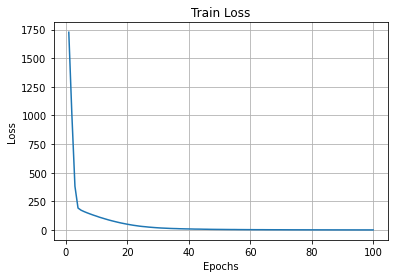

In [24]:
if new_model_train:
    optimizer = optim.Adam(model.parameters(), lr = LR)
    loss_history = Train(model, train_DL, criterion, optimizer, LR=LR, EPOCH=EPOCH)

    torch.save(model, save_model_path)

    plt.figure()
    plt.plot(range(1,EPOCH+1),loss_history)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train Loss")
    plt.grid()

In [25]:
load_model = torch.load(save_model_path, map_location=DEVICE)

Test loss: 200.0023956298828
31


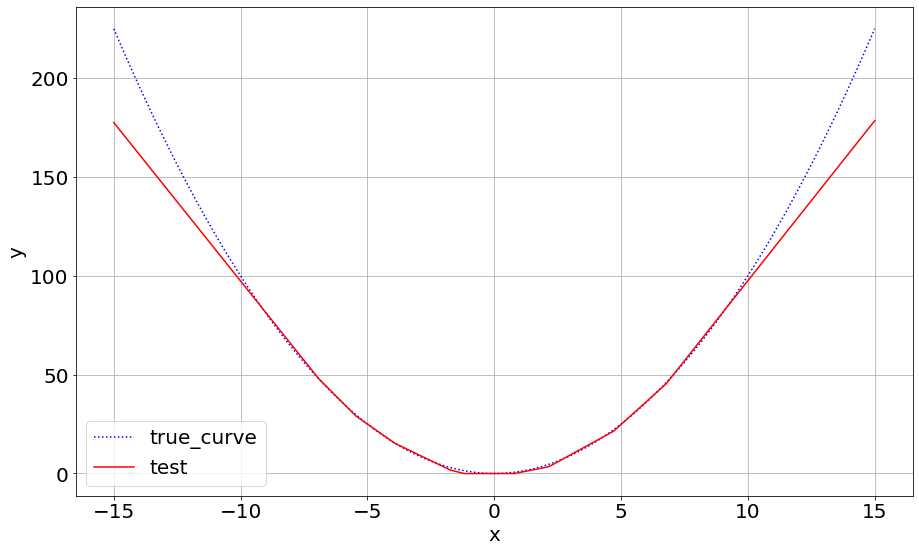

In [26]:
plt.figure(figsize=[15,9])
Test(load_model, X_test, Y_test)
print(count_params(load_model))

In [27]:
# 보여드린 증명 방식대로 훈련되는 것은 아니라는 것 확인!
print(model.fcs[0].weight)
print(model.fcs[0].bias)
print(model.fcs[2].weight)
print(model.fcs[2].bias)

Parameter containing:
tensor([[ 1.6086],
        [-1.9634],
        [ 1.3442],
        [-2.3814],
        [-1.3342],
        [-1.1610],
        [-1.2862],
        [ 2.1654],
        [ 1.6811],
        [ 1.8522]], requires_grad=True)
Parameter containing:
tensor([-7.5818, -3.3749, -9.1173, -2.8003, -7.2792, -8.0635, -5.0490, -1.7022,
        -3.5116, -4.1333], requires_grad=True)
Parameter containing:
tensor([[2.8175, 1.5455, 3.4261, 1.3271, 2.9093, 2.7264, 2.1832, 1.1716, 1.3329,
         1.2285]], requires_grad=True)
Parameter containing:
tensor([-0.0547], requires_grad=True)
